<a href="https://colab.research.google.com/github/Shahbaz894/MLOps/blob/main/DSMP_2_Assignment_by_shahbaz_Zulfiqar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv('/content/sample_data/icc_wc_23_bat.csv')

In [ ]:
df.head()

,player,dismissal,runs,balls,minutes,4s,6s,strike_rate,team,opponent,innings,match_id
0,Rohit Sharma,b Madushanka,4,2,2,1,0,200.00,India,Sri Lanka,1,0
1,Shubman Gill,c Mendis b Madushanka,92,92,136,11,2,100.00,India,Sri Lanka,1,0
2,Virat Kohli,c Nissanka b Madushanka,88,94,139,11,0,93.61,India,Sri Lanka,1,0
3,Shreyas Iyer,c Theekshana b Madushanka,82,56,84,3,6,146.42,India,Sri Lanka,1,0
4,KL Rahul,c Hemantha b Chameera,21,19,34,2,0,110.52,India,Sri Lanka,1,0


In [ ]:
# df.drop(['dismissal'], axis=1, inplace=True)


In [ ]:
df[["player","balls"]].groupby(["player"]).sum().sort_values("balls",ascending=False).head(10)

,balls
player,
Virat Kohli,847
Quinton de Kock,555
Rachin Ravindra,543
Rassie van der Dussen,530
Marnus Labuschagne,512
KL Rahul,498
Daryl Mitchell,497
David Warner,494
Ibrahim Zadran,493


In [ ]:
df[['player','balls']].groupby(['balls']).sum()

,player
balls,
0,Angelo MathewsJosh HazlewoodMark WoodShoriful ...
1,Jasprit BumrahHasan AliMarco JansenLitton DasS...
2,Rohit SharmaSadeera SamarawickramaSuryakumar Y...
3,Shreyas IyerJasprit BumrahShoriful IslamMitche...
4,Mohammed ShamiIftikhar AhmedWesley BarresiTemb...
...,...
127,Daryl Mitchell
128,Glenn Maxwell
132,Mitchell Marsh


In [ ]:
result = df[["player", "balls"]].groupby(["player"]).sum()
result = result[result['balls'] < 100].sort_values("balls", ascending=False).head(10)


In [ ]:
result.head(100)

,balls
player,
Mohammad Nawaz,97
Reeza Hendricks,94
Liam Livingstone,94
Taskin Ahmed,93
Adil Rashid,91
Mustafizur Rahman,89
Aryan Dutt,87
Roelof van der Merwe,85
Cameron Green,83


In [ ]:
players_to_drop = result.index

In [ ]:
players_to_drop

Index(['Mohammad Nawaz', 'Reeza Hendricks', 'Liam Livingstone', 'Taskin Ahmed',
       'Adil Rashid', 'Mustafizur Rahman', 'Aryan Dutt',
       'Roelof van der Merwe', 'Cameron Green', 'Mitchell Santner'],
      dtype='object', name='player')

In [ ]:
df_filter=df[~df['player'].isin(players_to_drop)]

In [ ]:
df_filter

,player,dismissal,runs,balls,minutes,4s,6s,strike_rate,team,opponent,innings,match_id
0,Rohit Sharma,b Madushanka,4,2,2,1,0,200.00,India,Sri Lanka,1,0
1,Shubman Gill,c Mendis b Madushanka,92,92,136,11,2,100.00,India,Sri Lanka,1,0
2,Virat Kohli,c Nissanka b Madushanka,88,94,139,11,0,93.61,India,Sri Lanka,1,0
3,Shreyas Iyer,c Theekshana b Madushanka,82,56,84,3,6,146.42,India,Sri Lanka,1,0
4,KL Rahul,c Hemantha b Chameera,21,19,34,2,0,110.52,India,Sri Lanka,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
870,Iftikhar Ahmed,c Malan b Ali,3,5,8,0,0,60.00,Pakistan,England,2,47
871,Shadab Khan,b Rashid,4,7,4,1,0,57.14,Pakistan,England,2,47
872,Shaheen Shah Afridi,lbw b Atkinson,25,23,23,3,1,108.69,Pakistan,England,2,47
873,Mohammad Wasim,not out,16,14,33,2,1,114.28,Pakistan,England,2,47


2.Feature Engineering:



*   Filter player who's score less than 100




In [ ]:
runs_per_player = df_filter.groupby('player')['runs'].sum()

In [ ]:
runs_per_player

player
Abdullah Shafique    336
Adam Zampa            48
Agha Salman           51
Aiden Markram        406
Alex Carey             0
                    ... 
Usama Mir              0
Vikramjit Singh       98
Virat Kohli          765
Wesley Barresi        83
Will Young           206
Name: runs, Length: 136, dtype: int64

In [ ]:
df_filter['dismissal'] = np.where(df_filter['dismissal'] == 'not out', 0, 1)

<ipython-input-29-437a876ad327>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['dismissal'] = np.where(df_filter['dismissal'] == 'not out', 0, 1)


In [ ]:
df_filter['dismissal'].head(100).value_counts()

1    88
0    12
Name: dismissal, dtype: int64

# Strike Rate
calculate the strike rate of each player

In [ ]:
# Assuming you have 'runs' and 'balls' columns in your DataFrame
df_filter['strike_rate'] = (df_filter['runs'] / df_filter['balls']) * 100


<ipython-input-35-dd62f3b12dcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['strike_rate'] = (df_filter['runs'] / df_filter['balls']) * 100


In [ ]:
df_filter['strike_rate']

0      200.000000
1      100.000000
2       93.617021
3      146.428571
4      110.526316
          ...    
870     60.000000
871     57.142857
872    108.695652
873    114.285714
874    152.173913
Name: strike_rate, Length: 816, dtype: float64

# Batting Avg
calculate the avg

In [ ]:


# Assuming 'runs' is the column representing the runs scored
# and 'dismissal' is the column representing whether the player is out or not (1 for out, 0 for not out)
df_filter['batting_avg'] = np.where(df_filter['dismissal'] == 1, df_filter['runs'], np.nan)

# Group by 'player' and calculate the mean of 'batting_avg'
batting_avg_per_player = df_filter.groupby('player')['batting_avg'].mean()

# Update the original DataFrame with the calculated batting averages
df_filtered = df_filter.merge(batting_avg_per_player, left_on='player', right_index=True, how='left', suffixes=('', '_avg'))


<ipython-input-55-ed461758f5ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['batting_avg'] = np.where(df_filter['dismissal'] == 1, df_filter['runs'], np.nan)


In [ ]:
df_filter['batting_avg'].head(100)

0       4.0
1      92.0
2      88.0
3      82.0
4      21.0
       ... 
102     0.0
103     3.0
104     3.0
105     2.0
108     4.0
Name: batting_avg, Length: 100, dtype: float64

In [ ]:
df_filter.head()

,player,dismissal,runs,balls,minutes,4s,6s,strike_rate,team,opponent,innings,match_id,batting_avg
0,Rohit Sharma,1,4,2,2,1,0,200.000000,India,Sri Lanka,1,0,4.0
1,Shubman Gill,1,92,92,136,11,2,100.000000,India,Sri Lanka,1,0,92.0
2,Virat Kohli,1,88,94,139,11,0,93.617021,India,Sri Lanka,1,0,88.0
3,Shreyas Iyer,1,82,56,84,3,6,146.428571,India,Sri Lanka,1,0,82.0
4,KL Rahul,1,21,19,34,2,0,110.526316,India,Sri Lanka,1,0,21.0


# **EDA **
EDA for new feature

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_filter['batting_avg'].isnull().sum()

133

In [ ]:
# Drop rows with NaN values in 'batting_avg' column
df_filtered.dropna(subset=['batting_avg'], inplace=True)

In [ ]:
df_filter['strike_rate'].isnull().sum()

4

In [ ]:
df_filtered.dropna(subset=['strike_rate'], inplace=True)

<ipython-input-71-428b33039d1f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filter['batting_avg'])


<Axes: xlabel='batting_avg', ylabel='Density'>

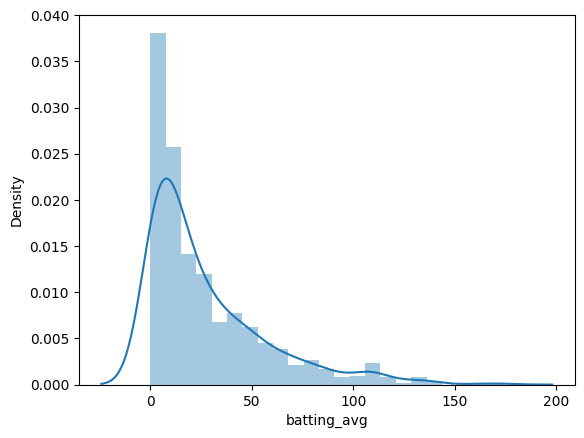

In [ ]:
sns.distplot(df_filter['batting_avg'])

<Axes: >

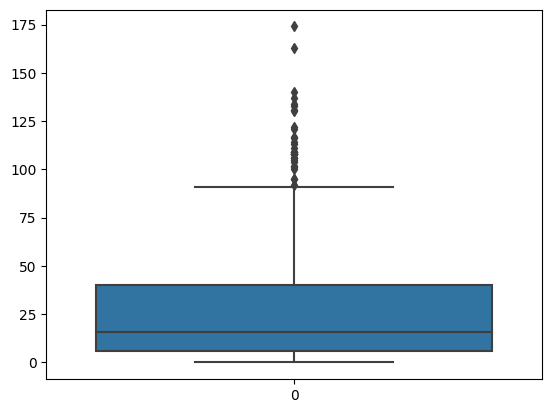

In [ ]:
# Box Plot

sns.boxplot(df_filter['batting_avg'])


<ipython-input-73-3028b9e09e53>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filter['strike_rate'])


<Axes: xlabel='strike_rate', ylabel='Density'>

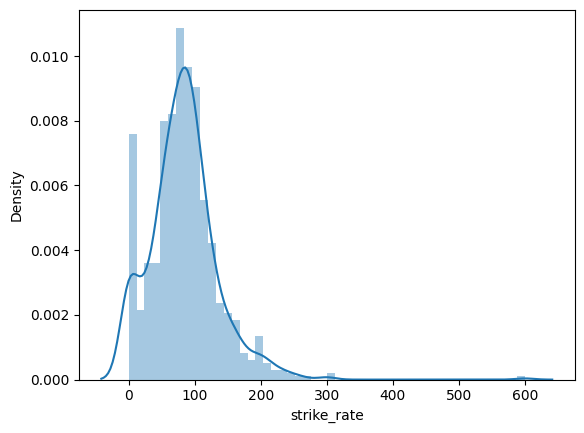

In [ ]:
sns.distplot(df_filter['strike_rate'])

<Axes: >

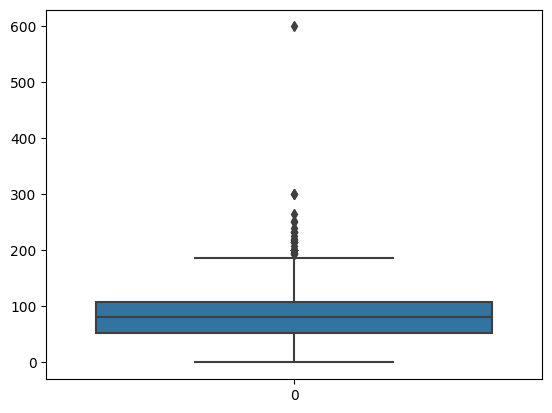

In [ ]:
sns.boxplot(df_filter['strike_rate'])

# K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = df_filtered[['batting_avg', 'strike_rate']]

In [ ]:
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_init = 11, n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

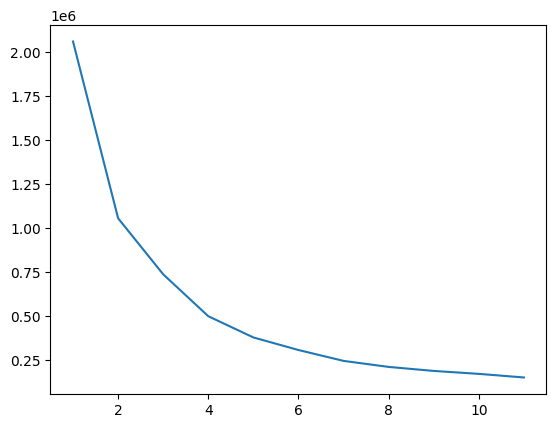

In [ ]:
plt.plot(range(1,12),wcss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


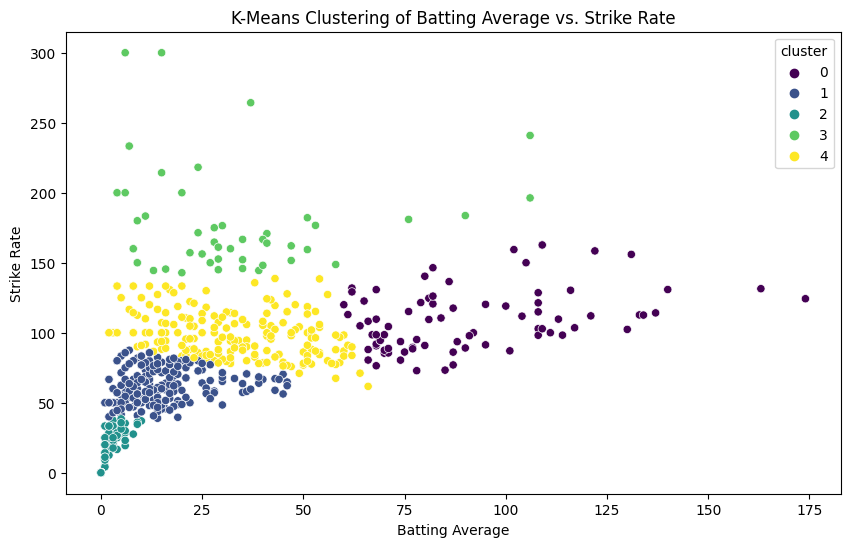

In [ ]:
k = 5

kmeans = KMeans(n_clusters=k, random_state=42)
df_filtered['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='batting_avg', y='strike_rate', hue='cluster', data=df_filtered, palette='viridis', legend='full')
plt.title('K-Means Clustering of Batting Average vs. Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')
plt.show()